In [82]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

**'baseline value':** FHR baseline (beats per minute)

**'accelerations':** Number of accelerations per second

**'fetal_movement':** Number of fetal movements per second

**'uterine_contractions':** Number of uterine contractions per second

**'light_decelerations':** Number of light decelerations per second

**'severe_decelerations':** Number of severe decelerations per second

**'prolongued_decelerations':** Number of prolonged decelerations per second

**'abnormal_short_term_variability':** Percentage of time with abnormal short term variability

**'mean_value_of_short_term_variability':** Mean value of short term variability

**'percentage_of_time_with_abnormal_long_term_variability':** Percentage of time with abnormal long term variability

**'mean_value_of_long_term_variability':** Mean value of long term variability

**'histogram_width':** Width of FHR histogram

**'histogram_min':** Minimum (low frequency) of FHR histogram

**'histogram_max':** Maximum (high frequency) of FHR histogram

**'histogram_number_of_peaks':** Number of histogram peaks

**'histogram_number_of_zeroes':** Number of histogram zeros

**'histogram_mode':** Histogram mode

**'histogram_mean':** Histogram mean

**'histogram_median':** Histogram median

**'histogram_variance':** Histogram variance

**'histogram_tendency':** Histogram tendency

**'fetal_health':** 1 (Normal), 2 (Suspect) and 3 (Pathological)



In [83]:
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [84]:
df.dtypes

baseline value                                              int64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                             int64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability      int64
mean_value_of_long_term_variability                       float64
histogram_width                                             int64
histogram_min                                               int64
histogram_max                                               int64
histogram_number_of_peaks                                   int64
histogram_

In [85]:
# Check missing value
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [86]:
df.info() 
# Total have 2126 rows, 22 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [88]:
# Find out how many of each class there
df["fetal_health"].value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

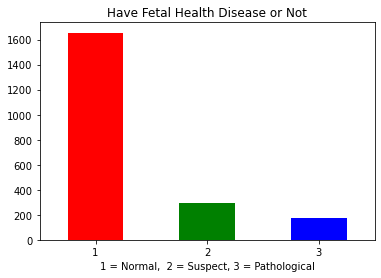

In [89]:
# Find out how many of each class there
df["fetal_health"].value_counts().plot(kind="bar", color=["red", "green", "blue"])
plt.title("Have Fetal Health Disease or Not")
plt.xlabel("1 = Normal,  2 = Suspect, 3 = Pathological" )
plt.xticks(rotation=0);

(22.5, -0.5)

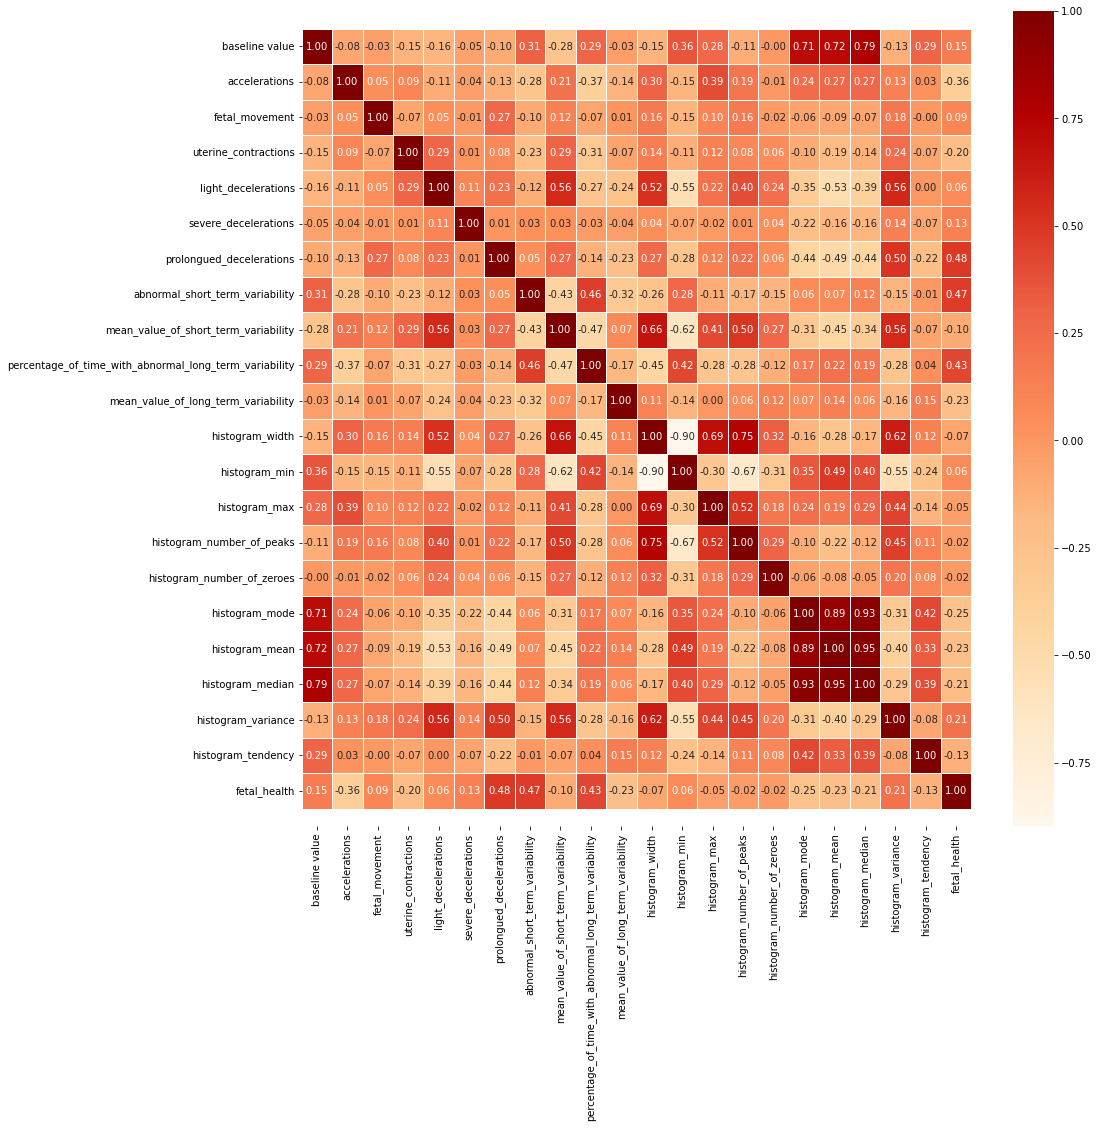

In [90]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="OrRd");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [91]:
X = df.drop('fetal_health', axis=1)
y = df.fetal_health

In [92]:
X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=42)

Text(0.5, 1.0, 'Test Class distribution')

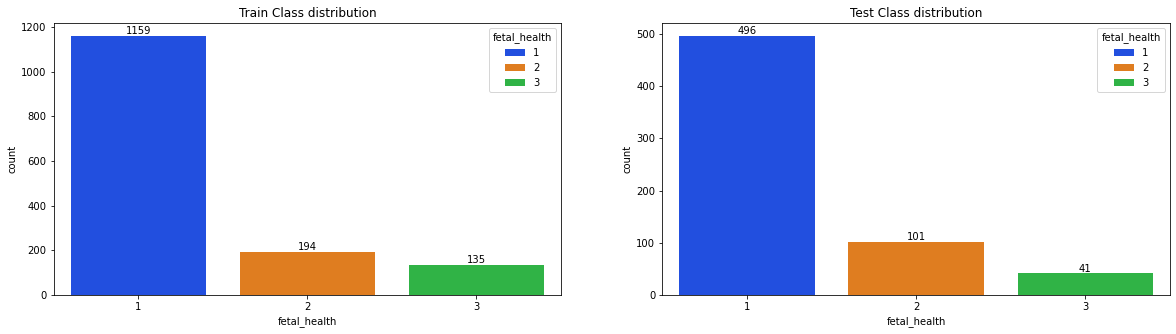

In [93]:
df_train=X_train.copy()
df_train['fetal_health']=y_train
df_test=X_test.copy()
df_test['fetal_health']=y_test

fig,ax=plt.subplots(1,2,figsize=(20,5))
g1=sns.countplot(data=df_train,x='fetal_health',hue='fetal_health',palette='bright',ax=ax[0],dodge=False)
g1.bar_label(g1.containers[0]);
g1.bar_label(g1.containers[1]);
g1.bar_label(g1.containers[2]);
ax[0].set_title('Train Class distribution')

g2=sns.countplot(data=df_test,x='fetal_health',hue='fetal_health',palette='bright',ax=ax[1],dodge=False)
g2.bar_label(g2.containers[0]);
g2.bar_label(g2.containers[1]);
g2.bar_label(g2.containers[2]);
ax[1].set_title('Test Class distribution')

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# The data seems unbalanced. I use a SMOTE resampling technique
sm=SMOTE(random_state=42)

#da ora in avanti si userà la lettera s per indicare dati bilanciato con SMOTE
X_train,y_train=sm.fit_resample(X_train,y_train)

In [95]:
scaler=StandardScaler()

# Balance and scale data 
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

# From now on the word "only" will be used to indicate data balanced with SMOTE
X_train_onlyscaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_onlyscaled=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

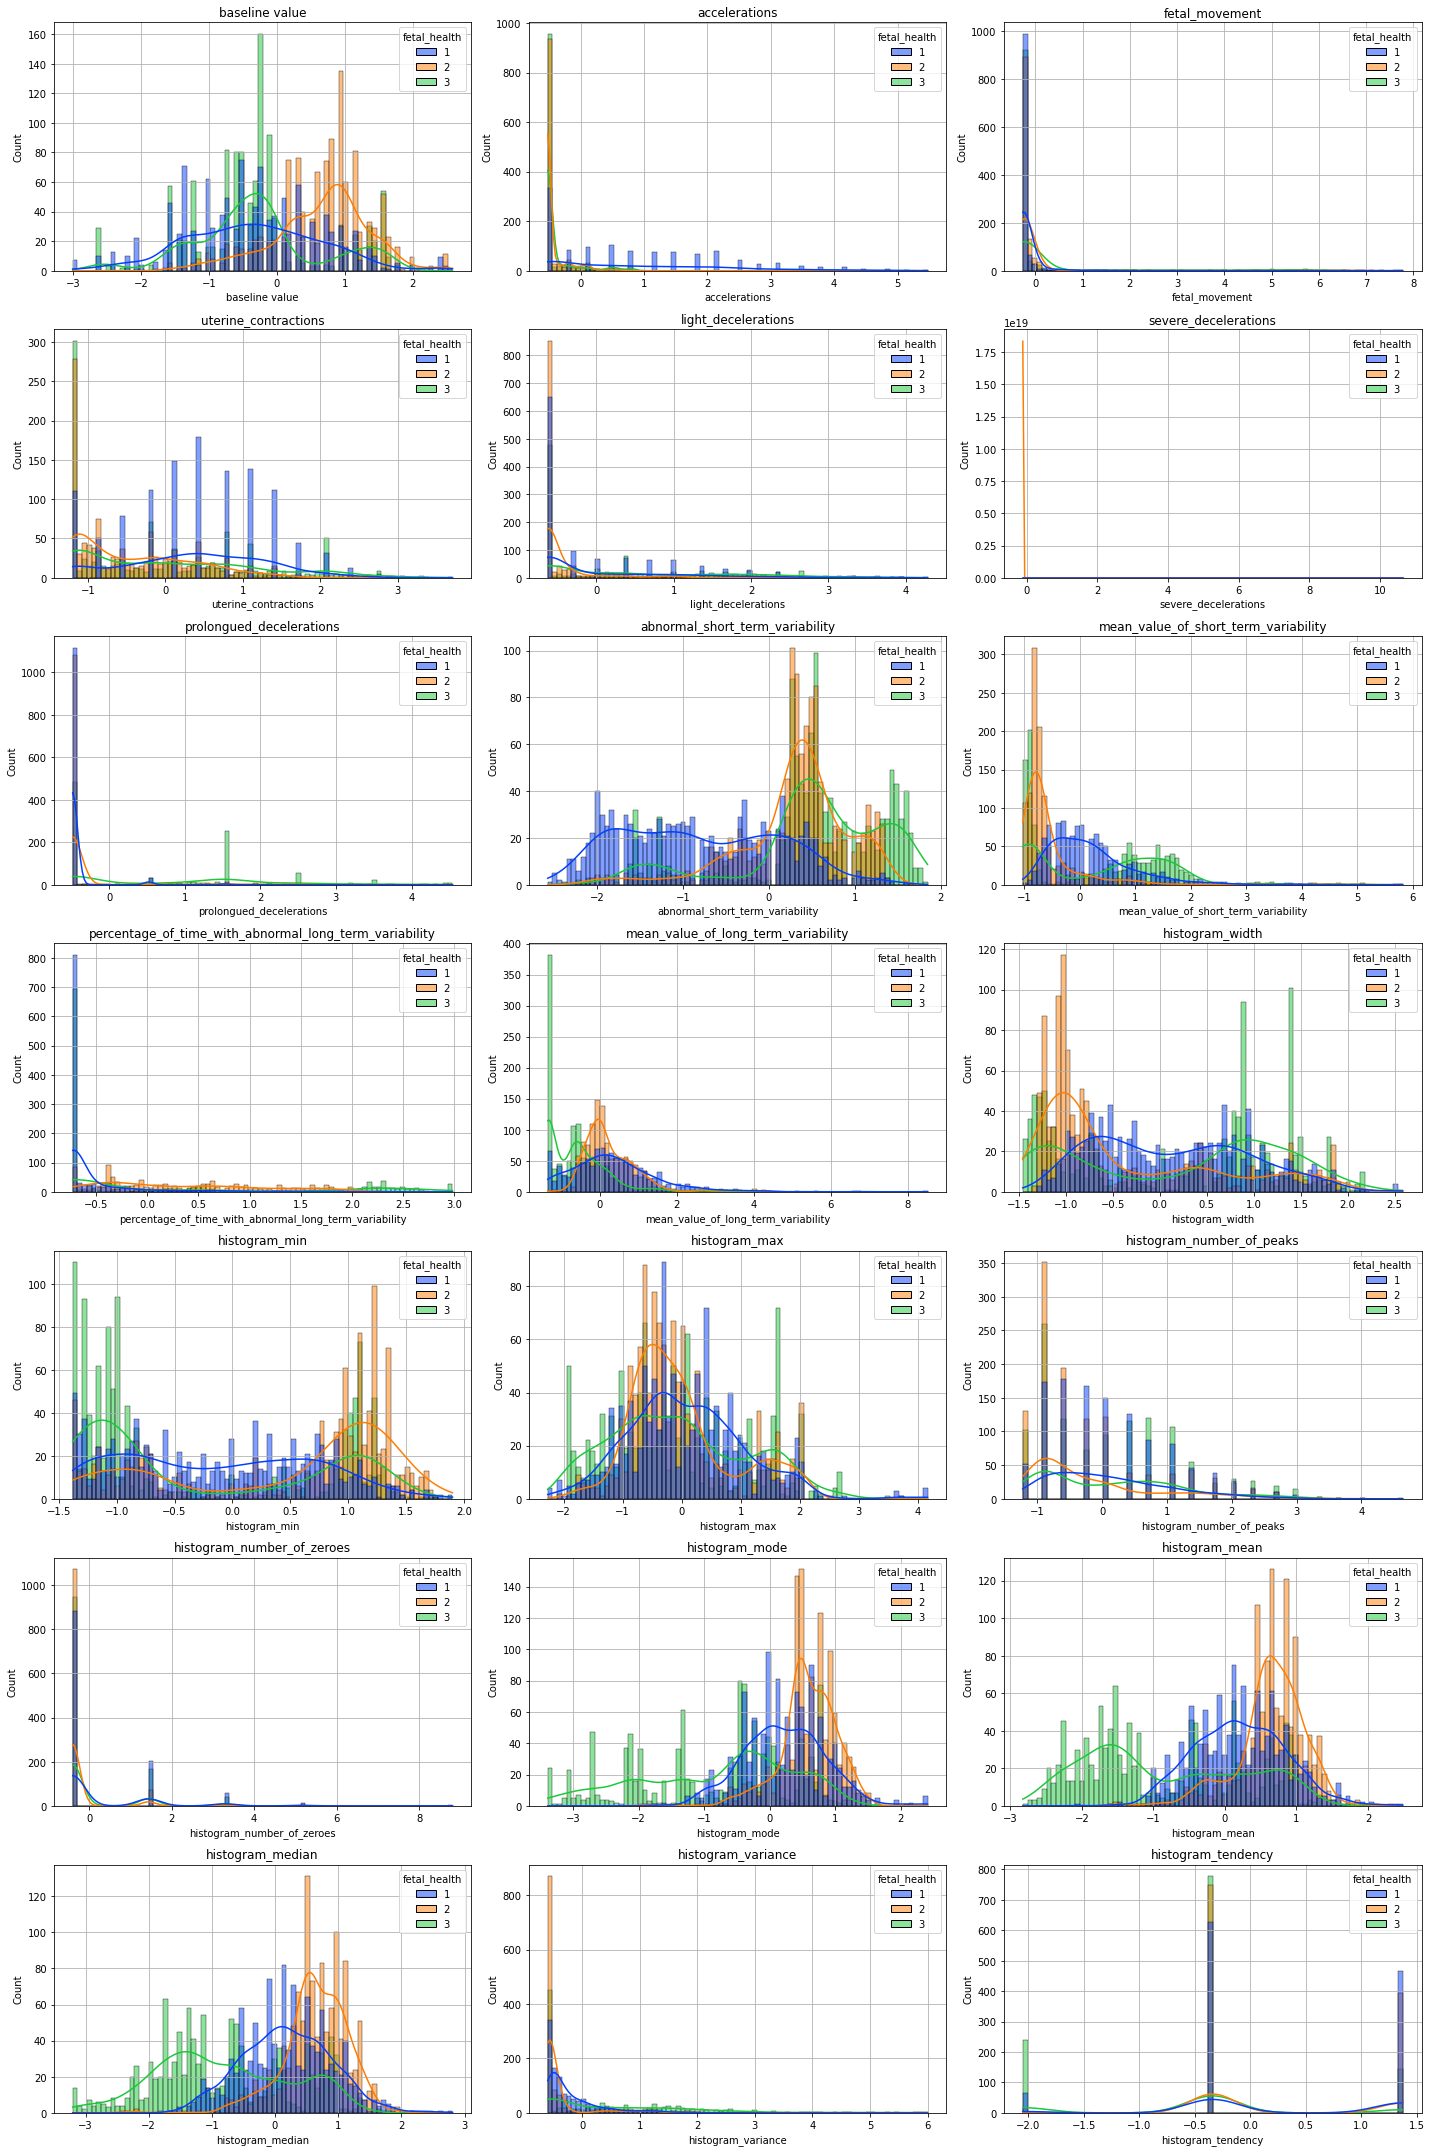

In [96]:
dfs=X_train_scaled.copy()
dfs['fetal_health']=y_train
fig,ax=plt.subplots(7,3,figsize=(20,30))
ax=ax.ravel()
for i, col in enumerate(X.columns):#.drop(['histogram_min','histogram_mode','histogram_median'])):
    sns.histplot(dfs,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='bright')
    ax[i].set_title(col)
    ax[i].grid()
plt.tight_layout()

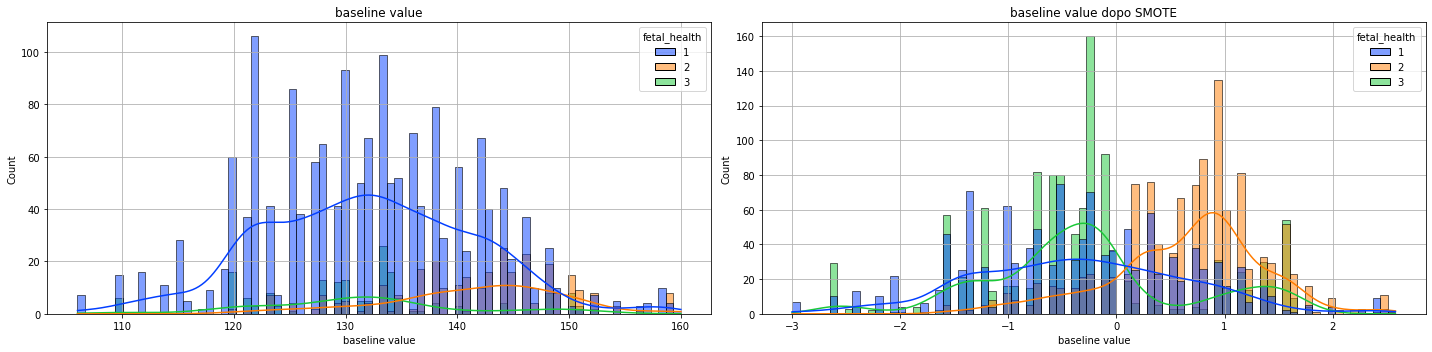

In [97]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax=ax.ravel()
sns.histplot(df,x='baseline value',hue='fetal_health',kde=True,bins=80,ax=ax[0],palette='bright')
ax[0].set_title('baseline value')
ax[0].grid()
sns.histplot(dfs,x='baseline value',hue='fetal_health',kde=True,bins=80,ax=ax[1],palette='bright')
ax[1].set_title('baseline value dopo SMOTE')
ax[1].grid()

plt.tight_layout()

Text(0.5, 1.0, 'Test Class distribution')

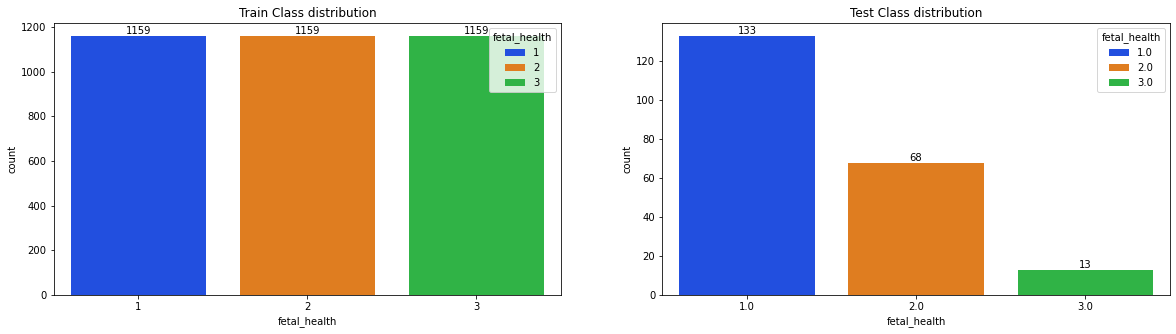

In [98]:
df_train=X_train_onlyscaled.copy()
df_train['fetal_health']=y_train
df_test=X_test_onlyscaled.copy()
df_test['fetal_health']=y_test

fig,ax=plt.subplots(1,2,figsize=(20,5))
g1=sns.countplot(data=df_train,x='fetal_health',hue='fetal_health',palette='bright',ax=ax[0],dodge=False)
g1.bar_label(g1.containers[0]);
g1.bar_label(g1.containers[1]);
g1.bar_label(g1.containers[2]);
ax[0].set_title('Train Class distribution')

g2=sns.countplot(data=df_test,x='fetal_health',hue='fetal_health',palette='bright',ax=ax[1],dodge=False)
g2.bar_label(g2.containers[0]);
g2.bar_label(g2.containers[1]);
g2.bar_label(g2.containers[2]);
ax[1].set_title('Test Class distribution')

In [99]:
#Create a conditional statement to visualize data for each model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True):
    if train:
        pred = clf.predict(X_train_onlyscaled)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_onlyscaled)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

1. Logistic Regression 

In [100]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_onlyscaled, y_train)

print_score(lr_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True)
print_score(lr_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=False)

Train Result:
Accuracy Score: 88.21%
_______________________________________________
CLASSIFICATION REPORT:
                     1            2            3  accuracy    macro avg  \
precision     0.950467     0.824793     0.878864  0.882082     0.884708   
recall        0.877481     0.861087     0.907679  0.882082     0.882082   
f1-score      0.912517     0.842550     0.893039  0.882082     0.882702   
support    1159.000000  1159.000000  1159.000000  0.882082  3477.000000   

           weighted avg  
precision      0.884708  
recall         0.882082  
f1-score       0.882702  
support     3477.000000  
_______________________________________________
Confusion Matrix: 
 [[1017  114   28]
 [  44  998  117]
 [   9   98 1052]]

Test Result:
Accuracy Score: 82.76%
_______________________________________________
CLASSIFICATION REPORT:
                    1           2          3  accuracy   macro avg  \
precision    0.974419    0.528169   0.515152  0.827586    0.672580   
recall       0.

In [101]:
#Create a dataframe to plot training and testing accuracy for each model for comparison
test_score = accuracy_score(y_test, lr_clf.predict(X_test_onlyscaled)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train_onlyscaled)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.208225,82.758621


2. K-Nearest Neighbors Claasifer

In [102]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_onlyscaled, y_train)

print_score(knn_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True)
print_score(knn_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=False)

Train Result:
Accuracy Score: 97.12%
_______________________________________________
CLASSIFICATION REPORT:
                     1            2            3  accuracy    macro avg  \
precision     0.996293     0.931763     0.989717   0.97124     0.972591   
recall        0.927524     0.989646     0.996549   0.97124     0.971240   
f1-score      0.960679     0.959833     0.993121   0.97124     0.971211   
support    1159.000000  1159.000000  1159.000000   0.97124  3477.000000   

           weighted avg  
precision      0.972591  
recall         0.971240  
f1-score       0.971211  
support     3477.000000  
_______________________________________________
Confusion Matrix: 
 [[1075   80    4]
 [   4 1147    8]
 [   0    4 1155]]

Test Result:
Accuracy Score: 86.05%
_______________________________________________
CLASSIFICATION REPORT:
                    1           2          3  accuracy   macro avg  \
precision    0.977221    0.563758   0.720000  0.860502    0.753660   
recall       0.

In [103]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test_onlyscaled)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train_onlyscaled)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.208225,82.758621
1,K-nearest neighbors,97.123957,86.050157


3. Suport Vector Machine

In [104]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train_onlyscaled, y_train)

print_score(svm_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True)
print_score(svm_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=False)

Train Result:
Accuracy Score: 96.72%
_______________________________________________
CLASSIFICATION REPORT:
                     1            2            3  accuracy    macro avg  \
precision     0.999070     0.922643     0.985357  0.967213     0.969023   
recall        0.926661     0.987921     0.987058  0.967213     0.967213   
f1-score      0.961504     0.954167     0.986207  0.967213     0.967293   
support    1159.000000  1159.000000  1159.000000  0.967213  3477.000000   

           weighted avg  
precision      0.969023  
recall         0.967213  
f1-score       0.967293  
support     3477.000000  
_______________________________________________
Confusion Matrix: 
 [[1074   81    4]
 [   1 1145   13]
 [   0   15 1144]]

Test Result:
Accuracy Score: 88.09%
_______________________________________________
CLASSIFICATION REPORT:
                    1           2          3  accuracy   macro avg  \
precision    0.980000    0.604317   0.755102  0.880878    0.779806   
recall       0.

In [105]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test_onlyscaled)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train_onlyscaled)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.208225,82.758621
1,K-nearest neighbors,97.123957,86.050157
2,Support Vector Machine,96.721311,88.087774


4. Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_onlyscaled, y_train)

print_score(tree_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True)
print_score(tree_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                1       2       3  accuracy  macro avg  weighted avg
precision     1.0     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0     1.0       1.0        1.0           1.0
support    1159.0  1159.0  1159.0       1.0     3477.0        3477.0
_______________________________________________
Confusion Matrix: 
 [[1159    0    0]
 [   0 1159    0]
 [   0    0 1159]]

Test Result:
Accuracy Score: 89.50%
_______________________________________________
CLASSIFICATION REPORT:
                    1           2          3  accuracy   macro avg  \
precision    0.954357    0.712963   0.708333  0.894984    0.791884   
recall       0.927419    0.762376   0.829268  0.894984    0.839688   
f1-score     0.940695    0.736842   0.764045  0.894984    0.813861   
support    496.000000  101.000000  

In [107]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test_onlyscaled)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train_onlyscaled)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.208225,82.758621
1,K-nearest neighbors,97.123957,86.050157
2,Support Vector Machine,96.721311,88.087774
3,Decision Tree Classifier,100.000000,89.498433


5. Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train_onlyscaled, y_train)

print_score(rf_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=True)
print_score(rf_clf, X_train_onlyscaled, y_train, X_test_onlyscaled, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                1       2       3  accuracy  macro avg  weighted avg
precision     1.0     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0     1.0       1.0        1.0           1.0
support    1159.0  1159.0  1159.0       1.0     3477.0        3477.0
_______________________________________________
Confusion Matrix: 
 [[1159    0    0]
 [   0 1159    0]
 [   0    0 1159]]

Test Result:
Accuracy Score: 93.73%
_______________________________________________
CLASSIFICATION REPORT:
                    1           2          3  accuracy   macro avg  \
precision    0.971487    0.821782   0.826087  0.937304    0.873119   
recall       0.961694    0.821782   0.926829  0.937304    0.903435   
f1-score     0.966565    0.821782   0.873563  0.937304    0.887304   
support    496.000000  101.000000  

In [109]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test_onlyscaled)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train_onlyscaled)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.208225,82.758621
1,K-nearest neighbors,97.123957,86.050157
2,Support Vector Machine,96.721311,88.087774
3,Decision Tree Classifier,100.000000,89.498433
4,Random Forest Classifier,100.000000,93.730408


In [110]:
#The first step is simply to train a random forest and extract one tree (we could also train a single decision tree).
model = RandomForestClassifier(max_depth = 3, n_estimators=10)
model.fit(X_train, y_train)
estimator_limited = model.estimators_[5]
estimator_limited

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=941243409)

In [111]:
#We take the trained tree and export it as a .dot file using export_graphviz.
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = X_train.columns,
                class_names = ['normal', 'suspect', 'pathological'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [112]:
#Next we use a system command to convert dot file to png.
!dot -Tpng tree_limited.dot -o tree_limited.png

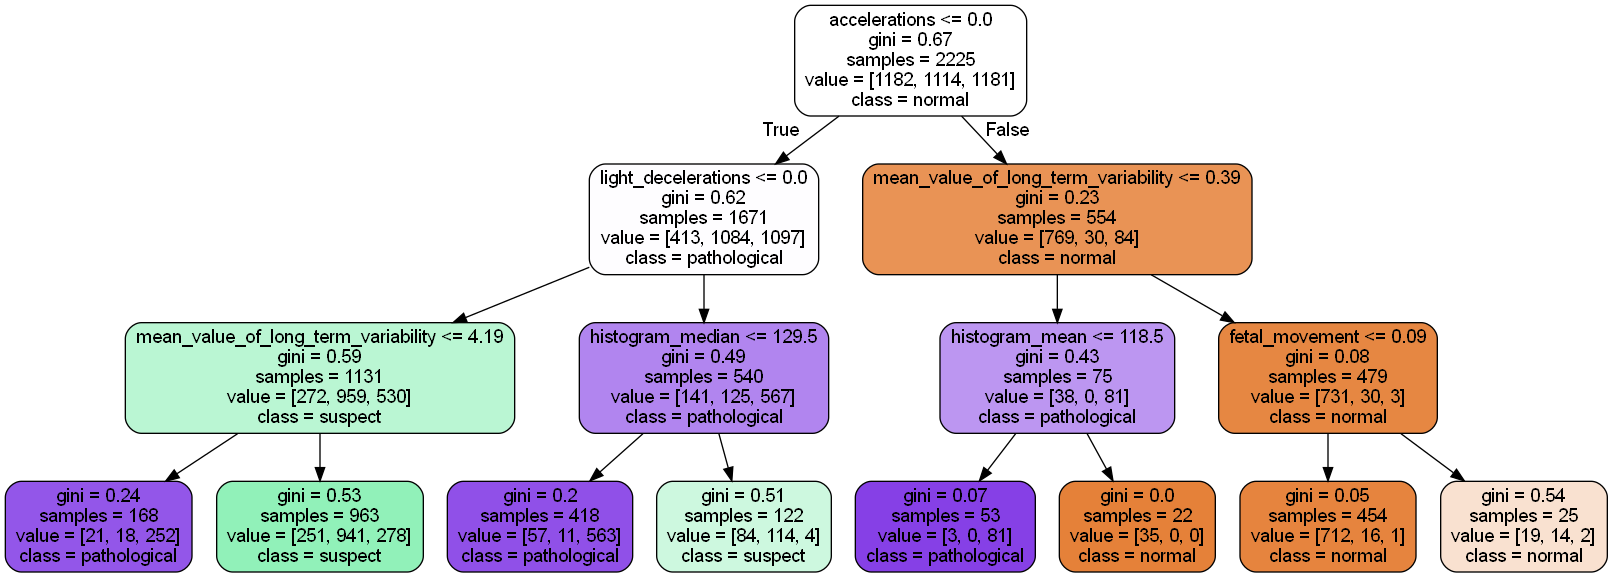

In [113]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [114]:
y_predict = model.predict(X_test_onlyscaled)
y_pred_quant = model.predict_proba(X_test_onlyscaled)[:, 1]
y_pred_bin = model.predict(X_test_onlyscaled)

[[287   0 209]
 [  7   0  94]
 [  0   0  41]]


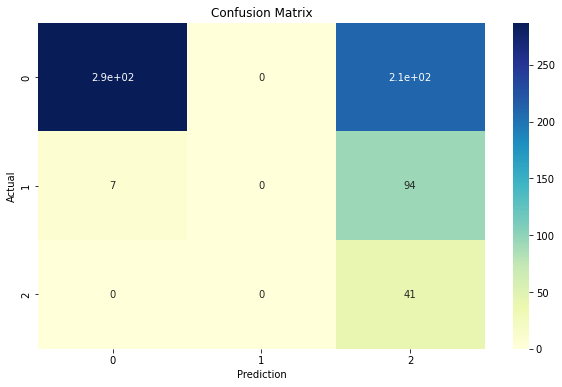

In [115]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
print(confusion_matrix)

#heatmap matrix
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [138]:
#Check sensitivity and specificity of RTF

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9761904761904762
Specificity :  nan


invalid value encountered in longlong_scalars


In [141]:
#Plot ROC of the model
fpr, tpr, thresholds = roc_curve(specificity, sensitivity)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [36]:
perm = PermutationImportance(model, random_state=1).fit(X_test_onlyscaled, y_test)
eli5.show_weights(perm, feature_names = X_test_onlyscaled.columns.tolist())

Weight,Feature
0.1016 ± 0.0186,accelerations
0.0226 ± 0.0108,prolongued_decelerations
0.0009 ± 0.0015,mean_value_of_long_term_variability
0.0006 ± 0.0015,light_decelerations
0 ± 0.0000,histogram_median
0 ± 0.0000,histogram_mean
0 ± 0.0000,histogram_mode
0 ± 0.0000,histogram_number_of_zeroes
0 ± 0.0000,histogram_number_of_peaks
0 ± 0.0000,histogram_max


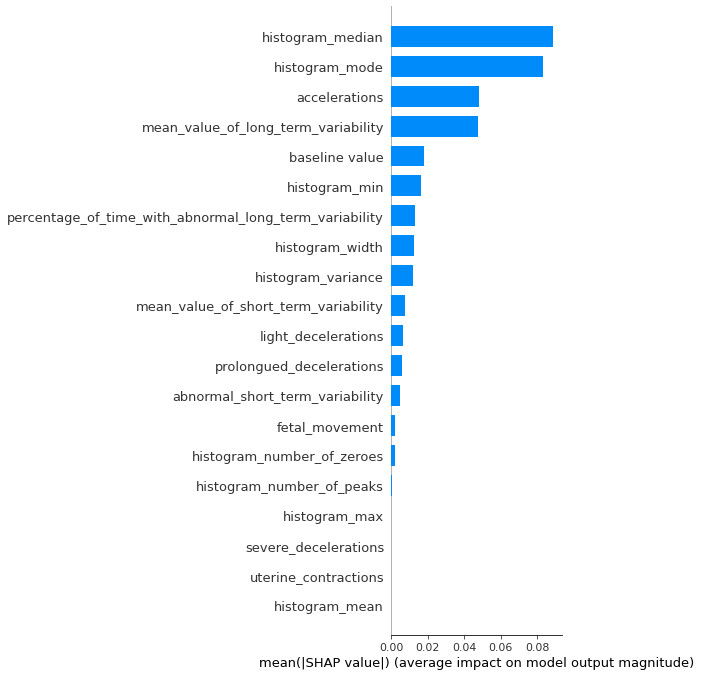

In [37]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_onlyscaled)

shap.summary_plot(shap_values[1], X_test_onlyscaled, plot_type="bar")

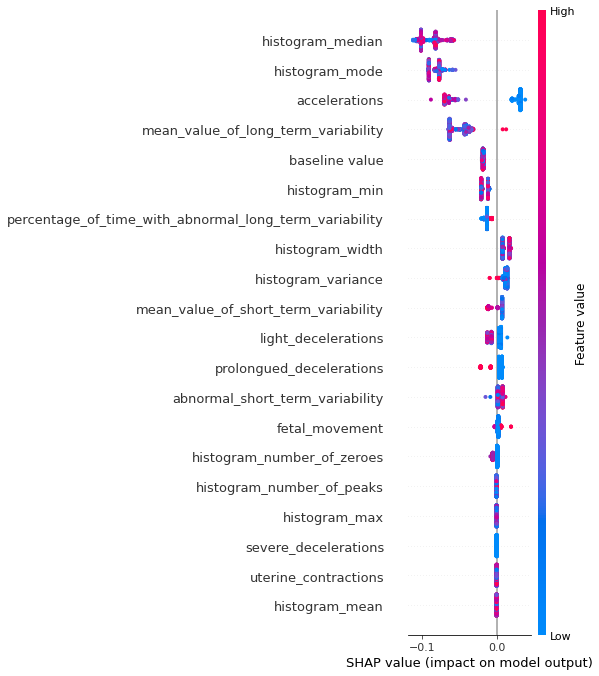

In [38]:
shap.summary_plot(shap_values[1], X_test_onlyscaled)

In [39]:
def fetal_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [40]:
data_for_prediction = X_test_onlyscaled.iloc[1,:].astype(float)
fetal_disease_risk_factors(model, data_for_prediction)

In [41]:
data_for_prediction = X_test_onlyscaled.iloc[25,:].astype(float)
fetal_disease_risk_factors(model, data_for_prediction)

In [42]:
data_for_prediction = X_test_onlyscaled.iloc[50,:].astype(float)
fetal_disease_risk_factors(model, data_for_prediction)

In [43]:
shap_values = explainer.shap_values(X_train_onlyscaled.iloc[:100])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test_onlyscaled.iloc[:100])